In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

#TO PREDICT THE HEATH INSURANCE PRICE BASED ON SOME INPUT DATA LIKE AGE,BMI,SMOKING_STATUS,GENDER,LOCATION.

#SO THAT IN FUTERE IT WILL HELP TO CALCULATE THE INSURANCE PRICE BASED ON INPUT DATA.

#TO SELECT THE BEST MODEL WITH LESS ERROR RATE MORE ACCURACY SCORE


In [ ]:
h_df=pd.read_excel('Health_insurance_cost.xlsx')

In [ ]:
h_df.describe()

,age,BMI,Children,health_insurance_price
count,1310.000000,1315.000000,1338.000000,1336.000000
mean,39.166412,30.638217,1.094918,13268.527719
std,14.055378,6.110302,1.205493,12112.797724
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.210000,0.000000,4744.325050
50%,39.000000,30.305000,1.000000,9382.033000
75%,51.000000,34.580000,2.000000,16604.302645
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
h_df.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

In [ ]:
print(h_df['age'].mean())
h_df['age'].median()

39.16641221374046


39.0

<ipython-input-8-8fbfe078714e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(h_df['age'])


<Axes: xlabel='age', ylabel='Density'>

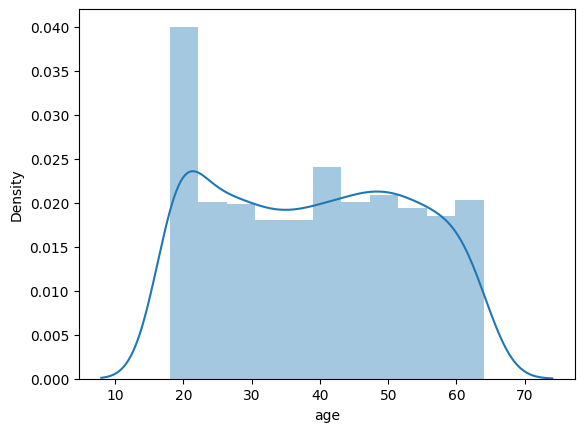

In [ ]:
sns.distplot(h_df['age'])  ###almost normal distribution

In [ ]:
h_df['age']=h_df['age'].fillna(h_df['age'].median())
h_df.isnull().sum()

age                        0
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

In [ ]:
print(h_df['BMI'].mean())

h_df['BMI'].median()

30.638216730038025


30.305

<ipython-input-14-f06908825f64>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(h_df['BMI'])


<Axes: xlabel='BMI', ylabel='Density'>

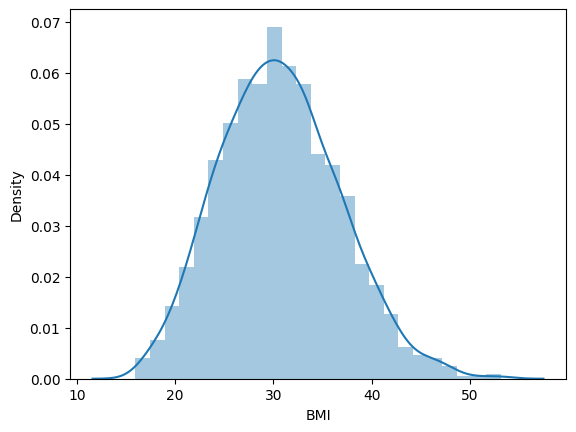

In [ ]:
sns.distplot(h_df['BMI'])  ###perfect normal distribution

In [ ]:
h_df['BMI']=h_df['BMI'].fillna(h_df['BMI'].median())

In [ ]:
h_df.isnull().sum()

age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    2
dtype: int64

<ipython-input-18-81a27ea9eb4b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(h_df['health_insurance_price'])


<Axes: xlabel='health_insurance_price', ylabel='Density'>

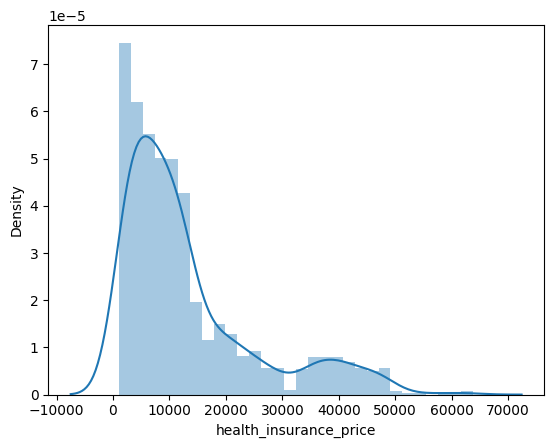

In [ ]:
sns.distplot(h_df['health_insurance_price'])

<ipython-input-23-fd64e93fd217>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(h_df['health_insurance_price'])


<Axes: xlabel='health_insurance_price', ylabel='Density'>

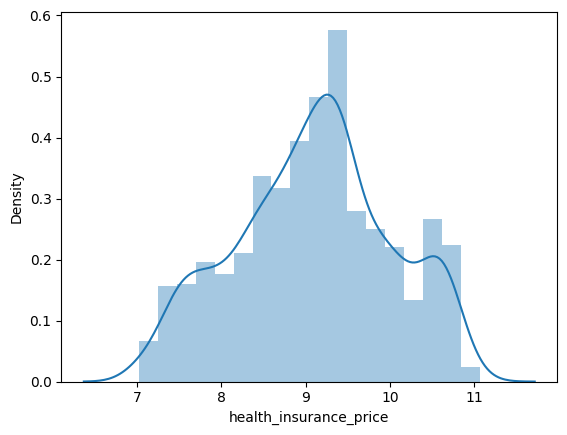

In [ ]:
h_df['health_insurance_price'] = np.log(h_df['health_insurance_price'])
sns.distplot(h_df['health_insurance_price'])

<Axes: >

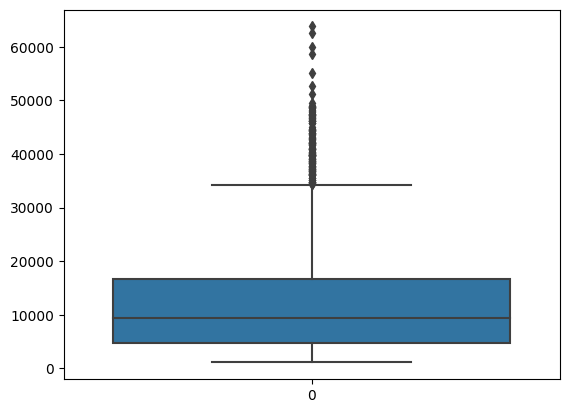

In [ ]:
sns.boxplot(h_df['health_insurance_price'])

In [ ]:
q1=h_df['health_insurance_price'].quantile(0.25)
q1

8.464704184664292

In [ ]:
q3=h_df['health_insurance_price'].quantile(0.75)
q3

9.717415413931965

In [ ]:
iqr=q3-q1
low_lim = q1 - 1.5 * iqr
up_lim = q3 + 1.5 * iqr
print('low_limit is', low_lim)
print('up_limit is', up_lim)
outlier =[]
for x in h_df['health_insurance_price']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print(' outlier in the dataset is', outlier)

low_limit is 6.585637340762783
up_limit is 11.596482257833475
 outlier in the dataset is []


In [ ]:
h_df.head(10)

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
5,31.0,female,25.740,0,no,southeast,3756.62160
6,46.0,female,33.440,1,no,southeast,8240.58960
7,37.0,female,27.740,3,no,northwest,7281.50560
8,37.0,male,29.830,2,no,northeast,6406.41070
9,60.0,female,25.840,0,no,northwest,28923.13692


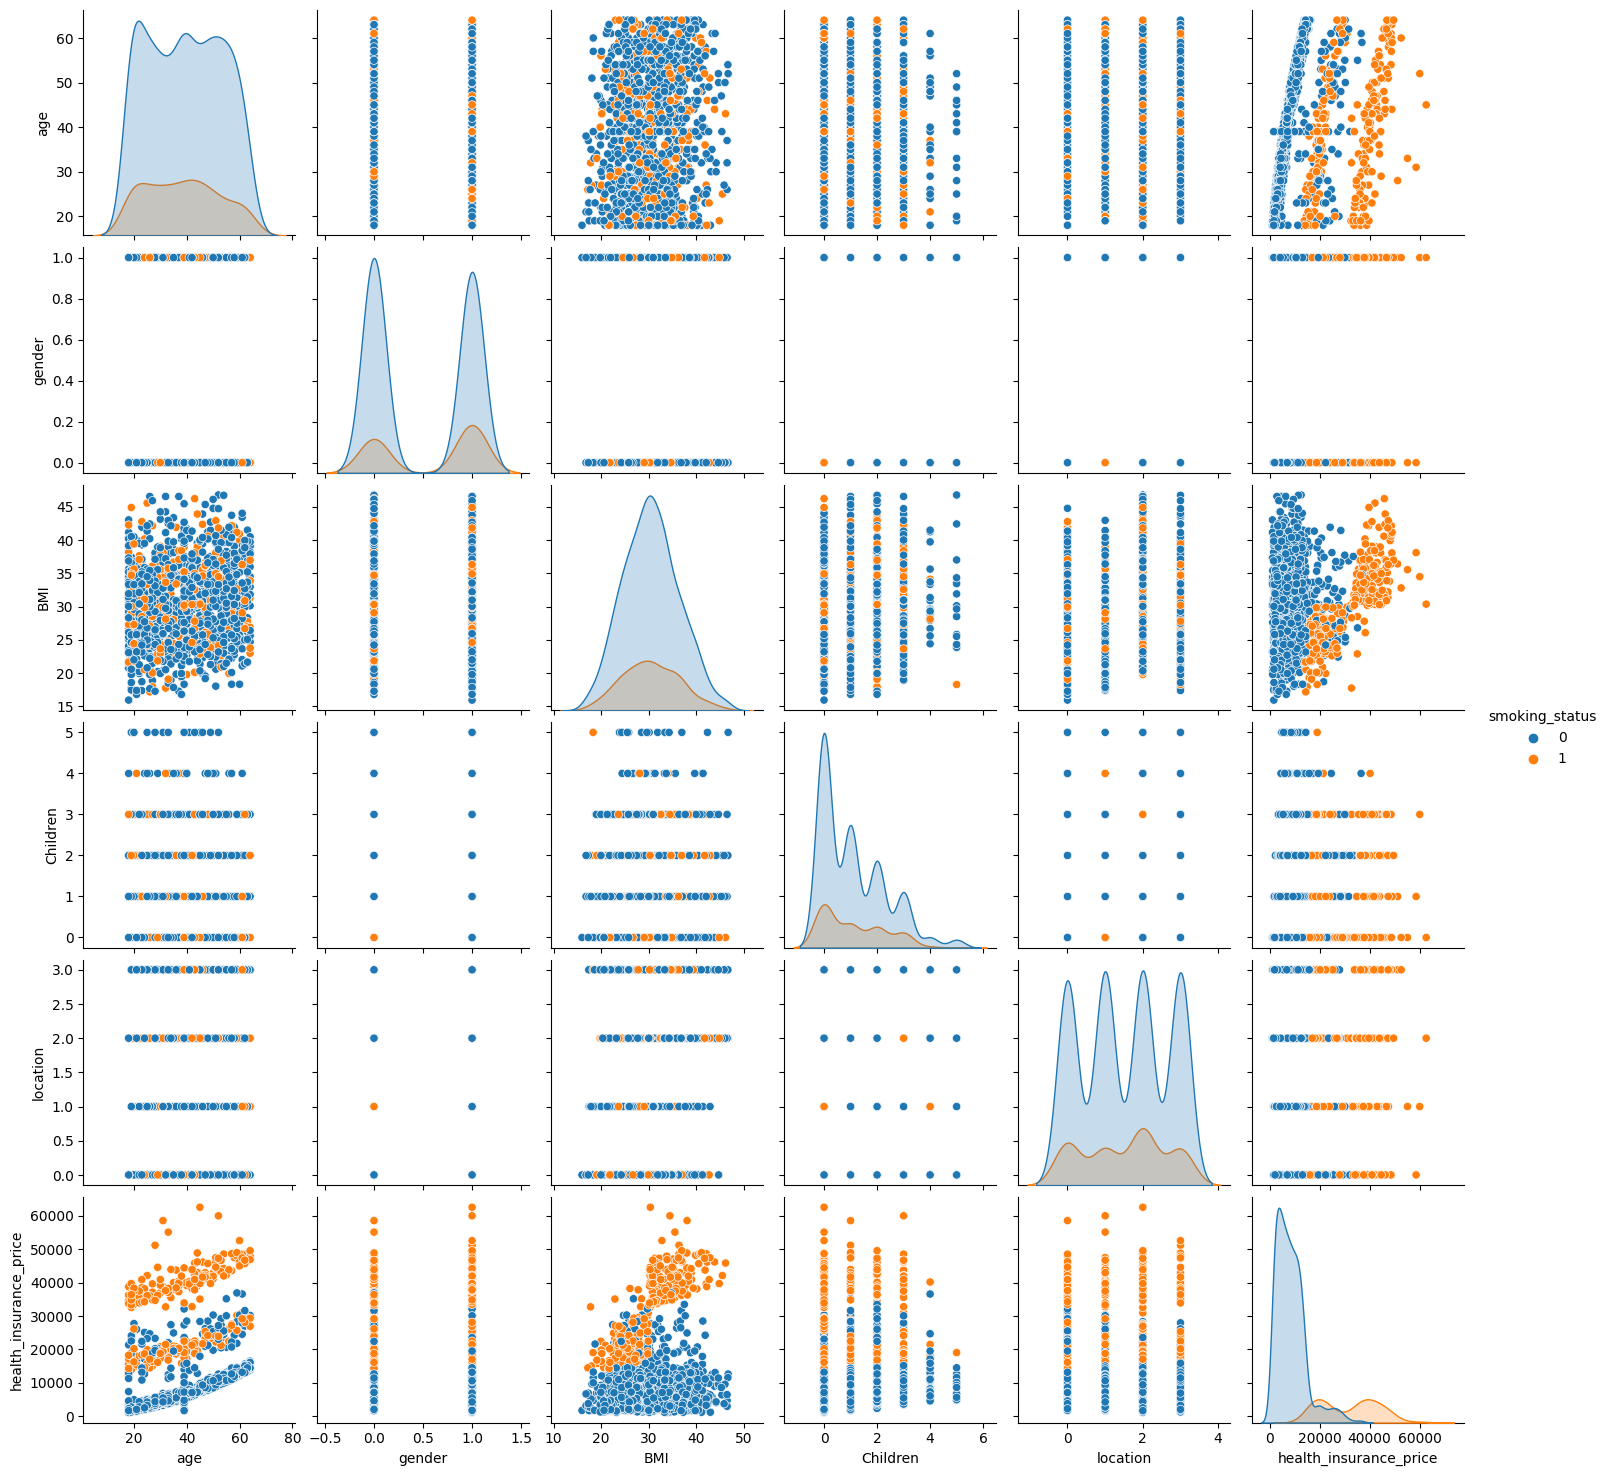

In [ ]:
sns.pairplot(data=h_df,hue='smoking_status')

## **##### Smokers with high BMI pay high insurance price.**
## **###people with less no of children smoke more**

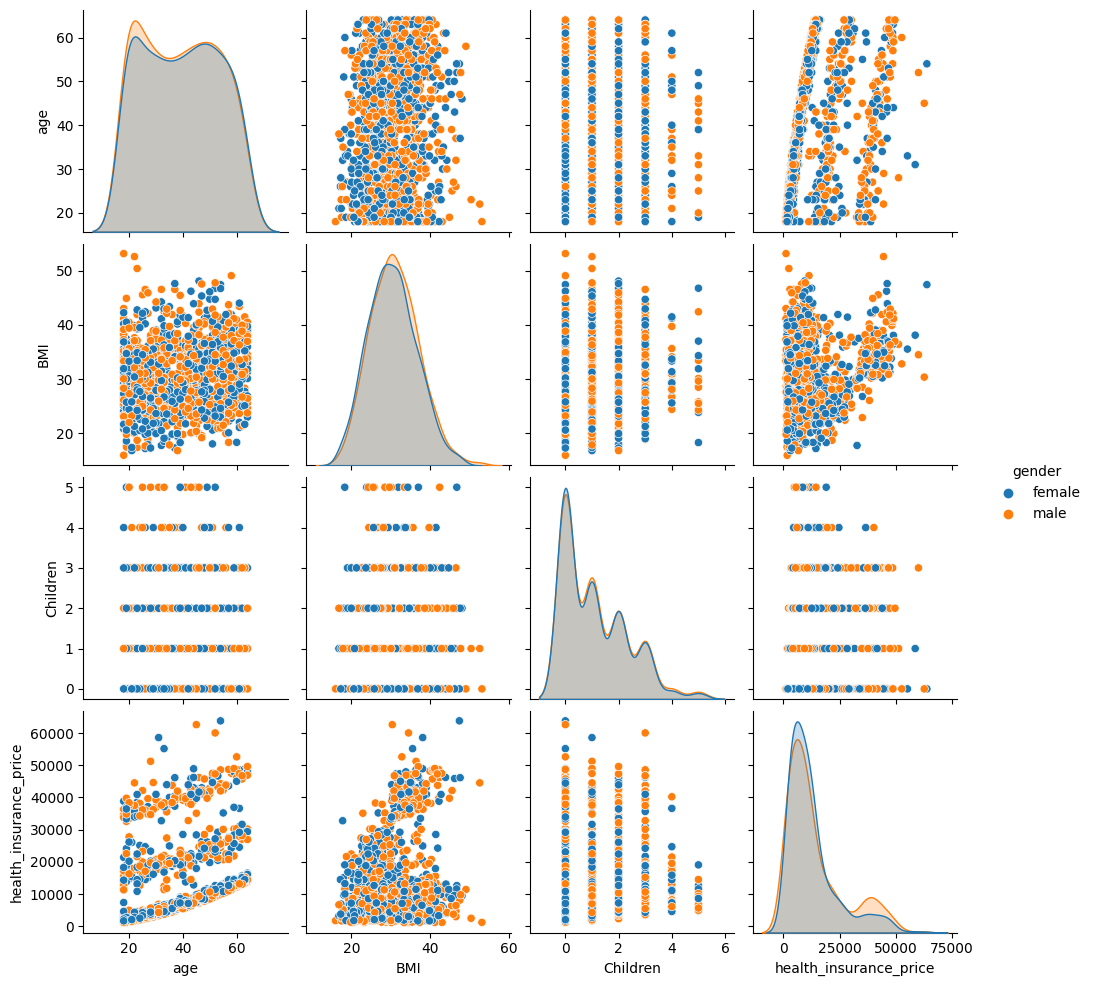

In [ ]:
sns.pairplot(data=h_df,hue='gender')

#higher insurance price(30k-40k) is paid by more no of males than females.

#NOT much impact of gender on health_insurance_price

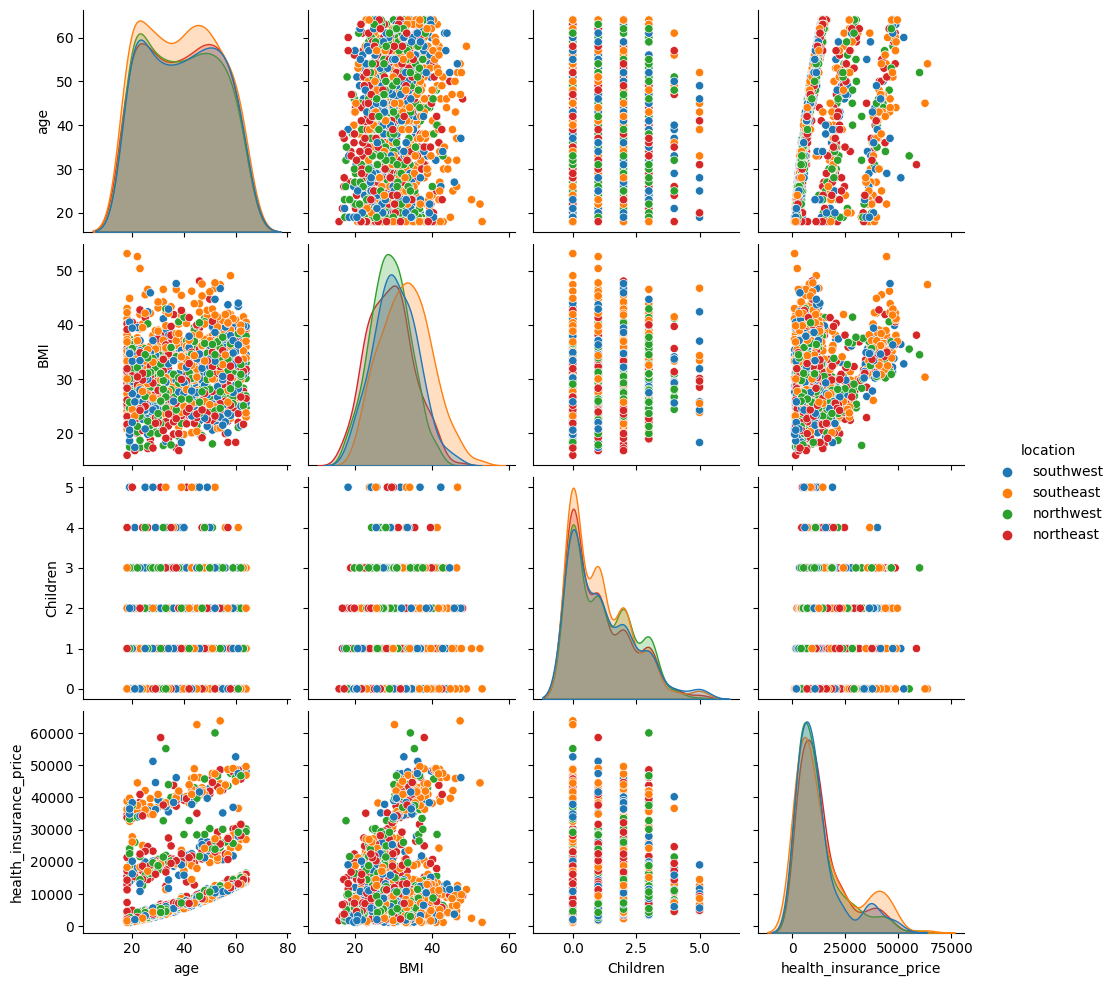

In [ ]:
sns.pairplot(data=h_df,hue='location')

<Axes: xlabel='age', ylabel='health_insurance_price'>

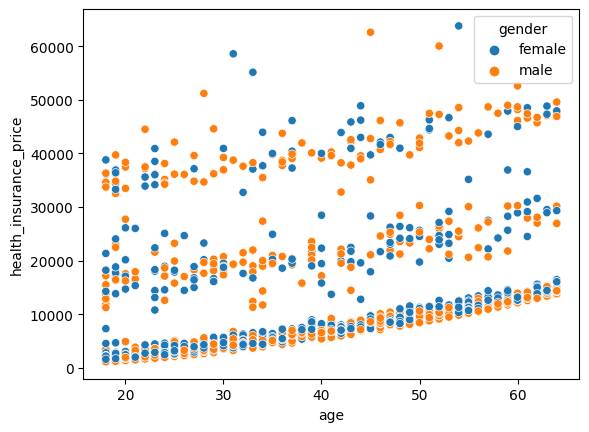

In [ ]:
sns.scatterplot(data=h_df,x='age',y='health_insurance_price',hue='gender')

#smokers of male gender are more than female & they pay higher price.
#only smokers pay insurance_price >30k

<Axes: xlabel='age', ylabel='health_insurance_price'>

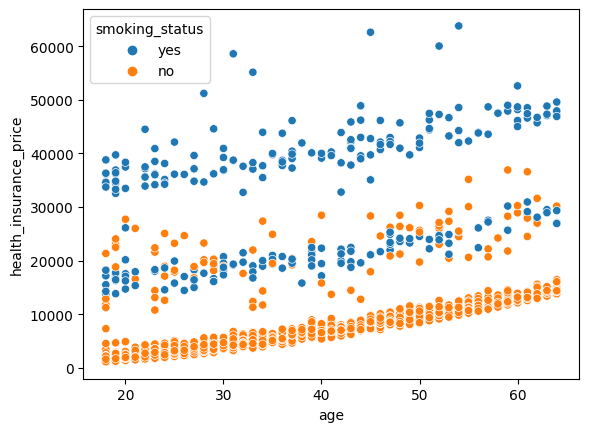

In [ ]:
sns.scatterplot(data=h_df,x='age',y='health_insurance_price',hue='smoking_status')

#BMI range(30-45) pay more insurance_price, consisting more no of males

<Axes: xlabel='BMI', ylabel='health_insurance_price'>

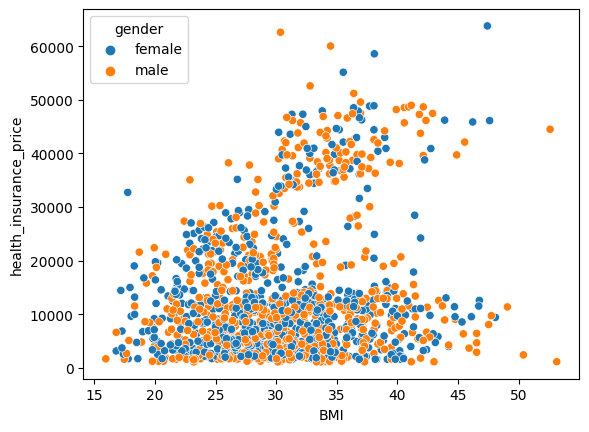

In [ ]:
sns.scatterplot(data=h_df,x='BMI',y='health_insurance_price',hue='gender')

#smokers having BMI<30 pay less when comapred with smokers having BMI>30

<Axes: xlabel='BMI', ylabel='health_insurance_price'>

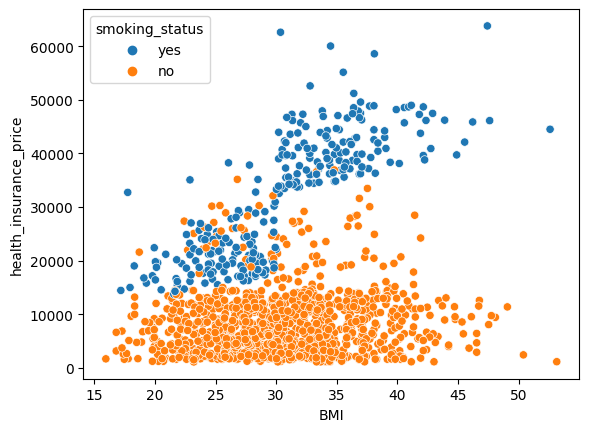

In [ ]:
sns.scatterplot(data=h_df,x='BMI',y='health_insurance_price',hue='smoking_status')

<ipython-input-11-d847d76d1f23>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(h_df.corr(),annot=True)


<Axes: >

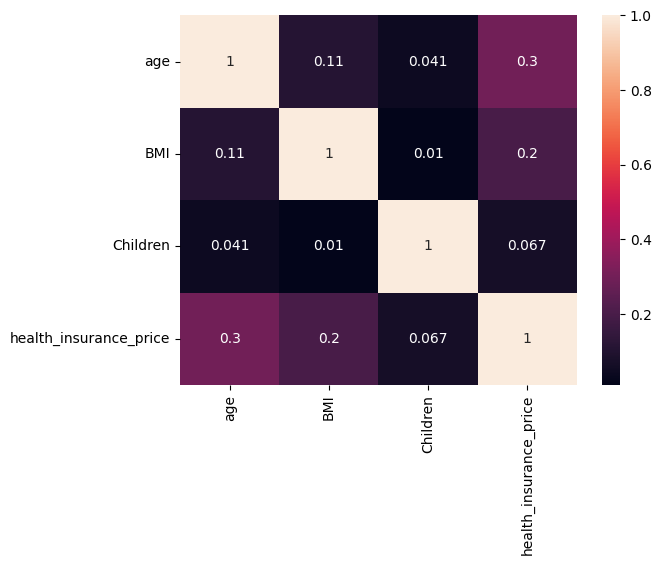

In [ ]:
sns.heatmap(h_df.corr(),annot=True)

<Axes: xlabel='smoking_status', ylabel='count'>

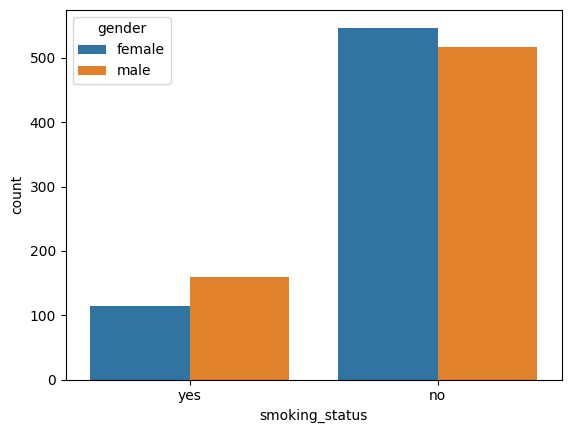

In [ ]:
sns.countplot(x=h_df['smoking_status'],hue=h_df['gender'])

In [ ]:
px.histogram(h_df,x='location',color='gender',pattern_shape='smoking_status', title='Location,sex & smokers comaprision')

In [ ]:
h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [ ]:
h_df.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

<ipython-input-6-8fbfe078714e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(h_df['age'])


<Axes: xlabel='age', ylabel='Density'>

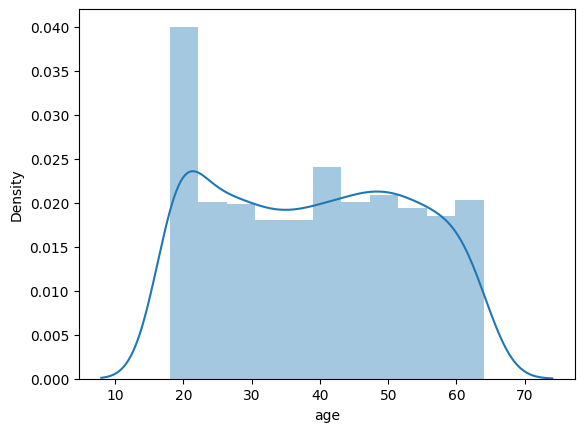

In [ ]:
sns.distplot(h_df['age'])

In [ ]:
print(h_df['age'].mean())
h_df['age'].median()

39.16641221374046


39.0

In [ ]:
h_df['age']=h_df['age'].fillna(h_df['age'].median())
h_df

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830
1334,18.0,female,31.920,0,no,northeast,2205.98080
1335,18.0,female,36.850,0,no,southeast,1629.83350
1336,21.0,female,25.800,0,no,southwest,2007.94500


In [ ]:
print(h_df['BMI'].mean())
h_df['BMI'].median()

30.632488789237673


30.305

In [ ]:
h_df['BMI']=h_df['BMI'].fillna(h_df['BMI'].median())
h_df

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,30.305,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830
1334,18.0,female,31.920,0,no,northeast,2205.98080
1335,18.0,female,36.850,0,no,southeast,1629.83350
1336,21.0,female,25.800,0,no,southwest,2007.94500


<Axes: xlabel='BMI'>

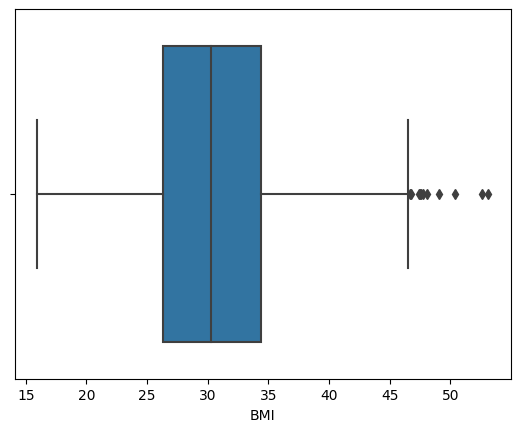

In [ ]:
sns.boxplot(x=h_df['BMI'])

Outliers:  [array([], dtype=object), array([49.06, 48.07, 47.52, 46.75, 47.41, 46.7, 50.38, 47.6, 52.58, 47.74,
       53.13], dtype=object), array([], dtype=object), array([39611.7577, 36837.467, 37701.8768, 38711.0, 35585.576, 51194.55914,
       39774.2763, 48173.361, 38709.176, 37742.5757, 47496.49445,
       37165.1638, 39836.519, 43578.9394, 47291.055, 47055.5321,
       39556.4945, 40720.55105, 36950.2567, 36149.4835, 48824.45,
       43753.33705, 37133.8982, 34779.615, 38511.6283, 35160.13457,
       47305.305, 44260.7499, 41097.16175, 43921.1837, 36219.40545,
       46151.1245, 42856.838, 48549.17835, 47896.79135, 42112.2356,
       38746.3551, 42124.5153, 34838.873, 35491.64, 42760.5022, 47928.03,
       48517.56315, 41919.097, 36085.219, 38126.2465, 42303.69215,
       46889.2612, 46599.1084, 39125.33225, 37079.372, 35147.52848,
       48885.13561, 36197.699, 38245.59327, 48675.5177, 63770.42801,
       45863.205, 39983.42595, 45702.02235, 58571.07448, 43943.8761,
       392

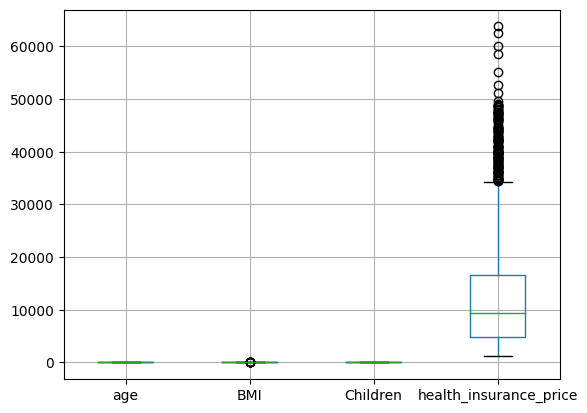

In [ ]:
df = pd.DataFrame(h_df)
_, bp = pd.DataFrame.boxplot(df, return_type='both')
outliers = [flier.get_ydata() for flier in bp["fliers"]]
boxes = [box.get_ydata() for box in bp["boxes"]]
medians = [median.get_ydata() for median in bp["medians"]]
whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]

print("Outliers: ", outliers)
print("Boxes: ", boxes)
print("Medians: ", medians)
print("Whiskers: ", whiskers)

plt.show()

In [ ]:
#delete all BMI rows greater than 47
index_BMI=h_df[h_df['BMI']>47].index
h_df.drop(index_BMI,inplace=True)
h_df

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,30.305,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830
1334,18.0,female,31.920,0,no,northeast,2205.98080
1335,18.0,female,36.850,0,no,southeast,1629.83350
1336,21.0,female,25.800,0,no,southwest,2007.94500


<Axes: >

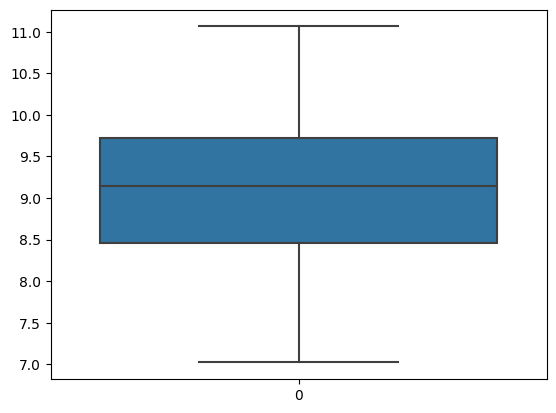

In [ ]:
sns.boxplot(h_df['health_insurance_price'])

In [ ]:
q1=h_df['health_insurance_price'].quantile(0.25)
q3=h_df['health_insurance_price'].quantile(0.75)
iqr=q3-q1
low_lim = q1 - 1.5 * iqr
up_lim = q3 + 1.5 * iqr
print('low_limit is', low_lim)
print('up_limit is', up_lim)
outlier =[]
for x in h_df['health_insurance_price']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print(' outlier in the dataset is', outlier)

In [ ]:
h_df=h_df.dropna()
h_df

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,30.305,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830
1334,18.0,female,31.920,0,no,northeast,2205.98080
1335,18.0,female,36.850,0,no,southeast,1629.83350
1336,21.0,female,25.800,0,no,southwest,2007.94500


In [ ]:
h_df.isnull().sum()

age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64

In [ ]:
h_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1327 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1327 non-null   float64
 1   gender                  1327 non-null   object 
 2   BMI                     1327 non-null   float64
 3   Children                1327 non-null   int64  
 4   smoking_status          1327 non-null   object 
 5   location                1327 non-null   object 
 6   health_insurance_price  1327 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 82.9+ KB


In [ ]:
##showing object columns
col=list(h_df.select_dtypes(include=object).columns)
col

['gender', 'smoking_status', 'location']

In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
h_df[col]=h_df[col].apply(le.fit_transform)

<ipython-input-11-54441d80e7bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_df[col]=h_df[col].apply(le.fit_transform)


In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
h_df.loc[:,['gender','smoking_status','location']]=h_df.loc[:,['gender','smoking_status','location']].apply(le.fit_transform)

<ipython-input-8-8923993298e9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_df.loc[:,['gender','smoking_status','location']]=h_df.loc[:,['gender','smoking_status','location']].apply(le.fit_transform)
<ipython-input-8-8923993298e9>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  h_df.loc[:,['gender','smoking_status','location']]=h_df.loc[:,['gender','smoking_status','location']].apply(le.fit_transform)


In [ ]:
h_df

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0,30.305,0,1,3,16884.92400
1,18.0,1,33.770,1,0,2,1725.55230
2,28.0,1,33.000,3,0,2,4449.46200
3,33.0,1,22.705,0,0,1,21984.47061
4,32.0,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,1,30.970,3,0,1,10600.54830
1334,18.0,0,31.920,0,0,0,2205.98080
1335,18.0,0,36.850,0,0,2,1629.83350
1336,21.0,0,25.800,0,0,3,2007.94500


In [ ]:
X=h_df.iloc[:,:-1]
X

,age,gender,BMI,Children,smoking_status,location
0,19.0,0,30.305,0,1,3
1,18.0,1,33.770,1,0,2
2,28.0,1,33.000,3,0,2
3,33.0,1,22.705,0,0,1
4,32.0,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50.0,1,30.970,3,0,1
1334,18.0,0,31.920,0,0,0
1335,18.0,0,36.850,0,0,2
1336,21.0,0,25.800,0,0,3


In [ ]:
y=h_df.iloc[:,-1]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: health_insurance_price, Length: 1327, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split (X,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
num_cols=['age','BMI']
for i in num_cols:
 scale=sc.fit(X_train[[i]])
 X_train[i]= scale.transform(X_train[[i]])
 X_test[i] = scale.transform(X_test[[i]])

In [ ]:
X_train

,age,gender,BMI,Children,smoking_status,location
126,-1.456990,0,-0.343146,0,1,3
1043,-0.803352,0,-0.771949,0,0,3
1221,0.068166,1,-0.914312,2,0,2
739,-0.730725,1,0.000754,2,1,3
422,0.068166,1,0.424411,1,1,0
...,...,...,...,...,...,...
719,1.375442,0,0.538473,0,0,1
911,-1.529616,1,0.245172,0,1,0
1104,-0.149714,1,-0.085864,0,0,3
236,-1.529616,0,-0.612434,0,0,2


In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('train_score:',lr.score(X_train,y_train))
print('test_score:',lr.score(X_test,y_test))
print("Coefficients:",lr.coef_)
print("Intercept:",lr.intercept_)

train_score: 0.7305262960968553
test_score: 0.76616753264915
Coefficients: [ 3554.98552488  -286.04004396  1906.67400735   490.42584806
 22502.19868508  -344.35561552]
Intercept: 8553.287773654856


In [ ]:
#prediction of train & test values
y_pred=lr.predict(X_train)
y_pred_test=lr.predict(X_test)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

MAE: 4245.354567773669
MSE: 38362440.63859383
RMSE: 6193.742054573619


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_true=y_train,y_pred=y_pred)
print(r2)

0.7305262960968553


###73% of the variance in the insurance price is predicted by all independent variables.


In [ ]:
#Adjusted r2
N=X.shape[0] # shape is 0
p=6 # number of features
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  0.7293014156245683


In [ ]:
##MEAN OF RESIDUALS(ERRORS)
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 1.1368683772161603e-12


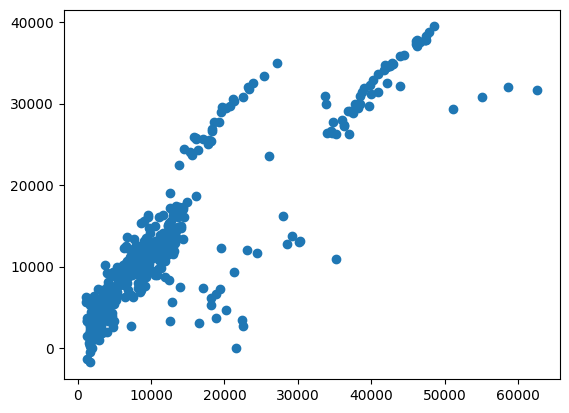

In [ ]:
#plotting predicted & actual values
plt.scatter(y_test,y_pred_test)

<ipython-input-25-951c65e7fee2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train-y_pred),bins=50)


<Axes: xlabel='health_insurance_price', ylabel='Density'>

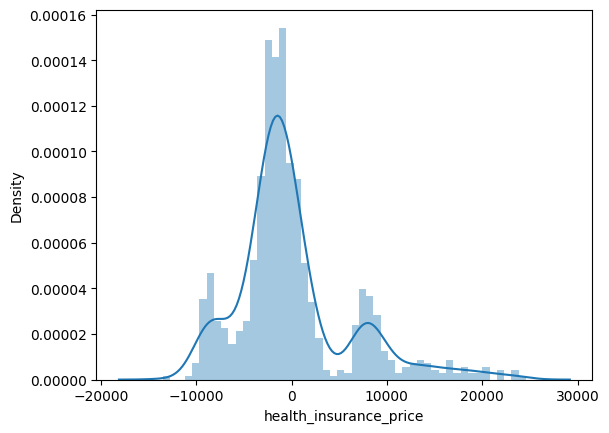

In [ ]:
sns.distplot((y_train-y_pred),bins=50)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

from sklearn import tree
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
rrm = RandomForestRegressor()

rrm.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
rrm_pred = rrm.predict(X_test)
mse = metrics.mean_squared_error(y_test,rrm_pred)
rmse = mse**.5
mae = metrics.mean_absolute_error(y_test,rrm_pred)
print('mse:',mse)
print('rmse:',rmse)
print('mae:',mae)

mse: 25422295.796718054
rmse: 5042.052736407866
mae: 2902.762601594027


In [ ]:
###scores
print(' Train Score is : ' , rrm.score(X_train, y_train))
print(' Test Score is : ' , rrm.score(X_test, y_test))


 Train Score is :  0.9732835285034587
 Test Score is :  0.8450422326391478


In [ ]:
##hypertuning params
rrm=RandomForestRegressor()
rrf=RandomForestRegressor(n_estimators=200,max_depth=4)
rrf.fit(X_train,y_train)
print(' Train Score is : ' , rrf.score(X_train, y_train))
print(' Test Score is : ' , rrf.score(X_test, y_test))

 Train Score is :  0.8568180814258749
 Test Score is :  0.8697421437446353


In [ ]:
rrm_pred = rrf.predict(X_test)
mse = metrics.mean_squared_error(y_test,rrm_pred)
rmse = mse**.5
mae = metrics.mean_absolute_error(y_test,rrm_pred)
print('mse:',mse)
print('rmse:',rmse)
print('mae:',mae)

mse: 21370040.41790842
rmse: 4622.774104140112
mae: 2702.62427896106


In [ ]:
from sklearn.metrics import r2_score
RRM_pred=rrf.predict(X_train)
r2 = r2_score(y_true=y_train,y_pred=RRM_pred)
print('for train_Data:',r2)
r3 = r2_score(y_true=y_test,y_pred=rrm_pred)
print('for test data',r3)

for train_Data: 0.8568180814258749
for test data 0.8697421437446353


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = { 'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'n_estimators': [150,200,300,400,500],
    'max_depth' : [2,3,4,5,6,7]

}
grid = GridSearchCV(rrm, param_grid,verbose = 3)
grid.fit(X_train,y_train)
grid.best_params_

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END criterion=squared_error, max_depth=2, n_estimators=150;, score=0.792 total time=   0.2s
[CV 2/5] END criterion=squared_error, max_depth=2, n_estimators=150;, score=0.769 total time=   0.2s
[CV 3/5] END criterion=squared_error, max_depth=2, n_estimators=150;, score=0.822 total time=   0.2s
[CV 4/5] END criterion=squared_error, max_depth=2, n_estimators=150;, score=0.831 total time=   0.3s
[CV 5/5] END criterion=squared_error, max_depth=2, n_estimators=150;, score=0.783 total time=   0.4s
[CV 1/5] END criterion=squared_error, max_depth=2, n_estimators=200;, score=0.793 total time=   0.5s
[CV 2/5] END criterion=squared_error, max_depth=2, n_estimators=200;, score=0.771 total time=   0.5s
[CV 3/5] END criterion=squared_error, max_depth=2, n_estimators=200;, score=0.822 total time=   0.5s
[CV 4/5] END criterion=squared_error, max_depth=2, n_estimators=200;, score=0.831 total time=   0.5s
[CV 5/5] END criterion=squar

{'criterion': 'poisson', 'max_depth': 4, 'n_estimators': 300}

In [ ]:
rrm=RandomForestRegressor(criterion='poisson',max_depth=4,n_estimators=300)
rrm.fit(X_train,y_train)
mse = metrics.mean_squared_error(y_test,rrm_pred)
rmse = mse**.5
mae = metrics.mean_absolute_error(y_test,rrm_pred)
print('mse:',mse)
print('rmse:',rmse)
print('mae:',mae)

mse: 21370040.41790842
rmse: 4622.774104140112
mae: 2702.62427896106


In [ ]:
print(' Train Score is : ' , rrm.score(X_train, y_train))
print(' Test Score is : ' , rrm.score(X_test, y_test))

 Train Score is :  0.856363402499263
 Test Score is :  0.8713644738838343


In [ ]:
Regressor = DecisionTreeRegressor()
Regressor.fit(X_train, y_train)
y2_pred=Regressor.predict(X_test)

###model overfitted(train_Score>>test_score)

In [ ]:
print('DecisionTreeRegressor Train Score is : ' ,Regressor.score(X_train, y_train))
print('DecisionTreeRegressor Test Score is : ' , Regressor.score(X_test, y_test))

DecisionTreeRegressor Train Score is :  0.9979148684818533
DecisionTreeRegressor Test Score is :  0.7000094014722005


In [ ]:
Regressor = DecisionTreeRegressor(max_depth=4)
Regressor.fit(X_train,y_train)
y2_pred=Regressor.predict(X_test)
print('DecisionTreeRegressor Train Score is : ' ,Regressor.score(X_train, y_train))
print('DecisionTreeRegressor Test Score is : ' , Regressor.score(X_test, y_test))

DecisionTreeRegressor Train Score is :  0.8474053964112611
DecisionTreeRegressor Test Score is :  0.8451611334768159


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = { 'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
  'max_depth' : [2,3,4,5,6,7]

}
grid = GridSearchCV(DecisionTreeRegressor(), param_grid,verbose = 3)
grid.fit(X_train,y_train)
grid.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END criterion=squared_error, max_depth=2;, score=0.764 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=2;, score=0.744 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=2;, score=0.811 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=2;, score=0.801 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=2;, score=0.780 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=3;, score=0.795 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=3;, score=0.786 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=3;, score=0.812 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=3;, score=0.850 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=3;, score=0.801 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=4;, score=0.823 total time=   0.0s
[CV 2/5] END criterion=sq

{'criterion': 'squared_error', 'max_depth': 4}

In [ ]:
from sklearn.tree import DecisionTreeRegressor
Regressor=DecisionTreeRegressor(criterion='squared_error',max_depth=4)
Regressor.fit(X_train,y_train)
y2_pred=Regressor.predict(X_test)
print(Regressor.score(X_train,y_train))
print(Regressor.score(X_test,y_test))
print(metrics.mean_squared_error(y_test,y2_pred))
mse = metrics.mean_squared_error(y_test,y2_pred)
rmse = mse**.5
mae = metrics.mean_absolute_error(y_test,y2_pred)
print('mse:',mse)
print('rmse:',rmse)
print('mae:',mae)

0.8474053964112611
0.845161133476816
25402788.983234882
mse: 25402788.983234882
rmse: 5040.117953305744
mae: 2831.8040965909818


In [ ]:
GBRModel = GradientBoostingRegressor()
GBRModel.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
print('GBRModel Train Score is : ' , GBRModel.score(X_train, y_train))
print('GBRModel Test Score is : ' , GBRModel.score(X_test, y_test))

GBRModel Train Score is :  0.8925097732005677
GBRModel Test Score is :  0.8604149899327278


In [ ]:
GBRModel = GradientBoostingRegressor(n_estimators=50,max_depth=2,learning_rate = .2 ,random_state=33)
GBRModel.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=2, n_estimators=50,
                          random_state=33)

In [ ]:
print('GBRModel Train Score is : ' , GBRModel.score(X_train, y_train))
print('GBRModel Test Score is : ' , GBRModel.score(X_test, y_test))

GBRModel Train Score is :  0.8638228543837561
GBRModel Test Score is :  0.8545000173231027


In [ ]:
GBR_pred=GBRModel.predict(X_test)
mse = metrics.mean_squared_error(y_test,GBR_pred)
rmse = mse**.5
mae = metrics.mean_absolute_error(y_test,GBR_pred)
print('mse:',mse)
print('rmse:',rmse)
print('mae:',mae)

mse: 22900248.726831842
rmse: 4785.420433653854
mae: 2714.277253889602


In [ ]:
X3_train=X_train.copy()
y3_train=y_train.copy()
X3_train

,age,gender,BMI,Children,smoking_status,location
126,-1.456990,0,-0.343146,0,1,3
1043,-0.803352,0,-0.771949,0,0,3
1221,0.068166,1,-0.914312,2,0,2
739,-0.730725,1,0.000754,2,1,3
422,0.068166,1,0.424411,1,1,0
...,...,...,...,...,...,...
719,1.375442,0,0.538473,0,0,1
911,-1.529616,1,0.245172,0,1,0
1104,-0.149714,1,-0.085864,0,0,3
236,-1.529616,0,-0.612434,0,0,2


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'n_estimators':[50,100,150,200,300,400],
    'max_depth':[2,3,4,5,6,7,8],
    'learning_rate':[0.1,0.2,0.3]
}
grid3=GridSearchCV(GradientBoostingRegressor(),param_grid,verbose=5)
grid3.fit(X3_train,y3_train)
grid3.best_params_

Fitting 5 folds for each of 126 candidates, totalling 630 fits
[CV 1/5] END learning_rate=0.1, max_depth=2, n_estimators=50;, score=0.823 total time=   0.3s
[CV 2/5] END learning_rate=0.1, max_depth=2, n_estimators=50;, score=0.813 total time=   0.1s
[CV 3/5] END learning_rate=0.1, max_depth=2, n_estimators=50;, score=0.830 total time=   0.2s
[CV 4/5] END learning_rate=0.1, max_depth=2, n_estimators=50;, score=0.867 total time=   0.2s
[CV 5/5] END learning_rate=0.1, max_depth=2, n_estimators=50;, score=0.821 total time=   0.2s
[CV 1/5] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=0.822 total time=   0.2s
[CV 2/5] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=0.816 total time=   0.4s
[CV 3/5] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=0.822 total time=   0.3s
[CV 4/5] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=0.869 total time=   0.4s
[CV 5/5] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=0.831 total time=

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [ ]:
GBRModel = GradientBoostingRegressor(learning_rate=0.1,max_depth=3,n_estimators=50,random_state=33)
GBRModel.fit(X_train, y_train)
print('train score',GBRModel.score(X_train,y_train))
print('test_score',GBRModel.score(X_test,y_test))

train score 0.8699337244323485
test_score 0.868567605582271


In [ ]:
GBR_pred=GBRModel.predict(X_test)
mse = metrics.mean_squared_error(y_test,GBR_pred)
rmse = mse**.5
mae = metrics.mean_absolute_error(y_test,GBR_pred)
print('mse:',mse)
print('rmse:',rmse)
print('mae:',mae)

mse: 21562734.57643115
rmse: 4643.569163524018
mae: 2688.3153586276144
